In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For ML Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
nifty50 = pd.read_csv('NIFTY50.csv')
niftynext50 = pd.read_csv('NIFTYNEXT50.csv')
banknifty = pd.read_csv('BANKNIFTY.csv')

In [3]:
nifty50.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,23-APR-2024,22447.05,22447.55,22349.45,22368.00,231520813,25651.64
1,24-APR-2024,22421.55,22476.45,22384.00,22402.40,235898642,21925.60
2,25-APR-2024,22316.90,22625.95,22305.25,22570.35,475044740,53803.80
3,26-APR-2024,22620.40,22620.40,22385.55,22419.95,329887340,36984.89
4,29-APR-2024,22475.55,22655.80,22441.90,22643.40,291957361,32431.45


In [6]:
# Check column names in each dataframe
print("Nifty50 columns:", nifty50.columns.tolist())
print("NiftyNext50 columns:", niftynext50.columns.tolist())
print("BankNifty columns:", banknifty.columns.tolist())

Nifty50 columns: ['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']
NiftyNext50 columns: ['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']
BankNifty columns: ['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']


In [7]:
for df in [nifty50, niftynext50, banknifty]:
    # Assuming the date column might be named differently in each dataframe
    date_col = [col for col in df.columns if 'date' in col.lower()]
    if date_col:
        date_col = date_col[0]  # Use the first matching column
        df[date_col] = pd.to_datetime(df[date_col])
        df.sort_values(date_col, inplace=True)
        df.reset_index(drop=True, inplace=True)
        df.fillna(method='ffill', inplace=True)
    else:
        print(f"No date column found in dataframe with columns: {df.columns.tolist()}")

In [8]:
for name, df in [("Nifty50", nifty50), ("NiftyNext50", niftynext50), ("BankNifty", banknifty)]:
    print(f"\n{name} head:")
    print(df.head(2))


Nifty50 head:
       Date      Open      High       Low    Close   Shares Traded   \
0 2024-04-23  22447.05  22447.55  22349.45  22368.0       231520813   
1 2024-04-24  22421.55  22476.45  22384.00  22402.4       235898642   

   Turnover (₹ Cr)  
0         25651.64  
1         21925.60  

NiftyNext50 head:
       Date      Open     High      Low     Close   Shares Traded   \
0 2024-04-23  63068.90  63068.9  62703.4  62798.55     307068493.0   
1 2024-04-24  63003.25  63460.1  62945.5  63277.40     308401449.0   

   Turnover (₹ Cr)  
0         12421.59  
1         13109.24  

BankNifty head:
       Date     Open     High      Low     Close   Shares Traded   \
0 2024-04-23  48299.6  48302.7  47899.3  47970.45     141110604.0   
1 2024-04-24  48120.9  48246.2  48028.7  48189.00     112159300.0   

   Turnover (₹ Cr)  
0          7677.26  
1          5867.57  


In [9]:
nifty50.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             248 non-null    datetime64[ns]
 1   Open             248 non-null    float64       
 2   High             248 non-null    float64       
 3   Low              248 non-null    float64       
 4   Close            248 non-null    float64       
 5   Shares Traded    248 non-null    int64         
 6   Turnover (₹ Cr)  248 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


In [11]:
# Check column names in each dataframe
print("Nifty50 columns:", nifty50.columns.tolist())
print("NiftyNext50 columns:", niftynext50.columns.tolist())
print("BankNifty columns:", banknifty.columns.tolist())

Nifty50 columns: ['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']
NiftyNext50 columns: ['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']
BankNifty columns: ['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ', 'Turnover (₹ Cr)']


In [12]:
# Check the first few rows of each dataframe to understand the structure
for name, df in [("Nifty50", nifty50), ("NiftyNext50", niftynext50), ("BankNifty", banknifty)]:
    print(f"\n{name} sample:")
    print(df.head(2))

# More flexible feature engineering approach
for df in [nifty50, niftynext50, banknifty]:
    # Find the correct column names (case-insensitive)
    high_col = next((col for col in df.columns if 'high' in col.lower()), None)
    low_col = next((col for col in df.columns if 'low' in col.lower()), None)
    open_col = next((col for col in df.columns if 'open' in col.lower()), None)
    
    if high_col and low_col and open_col:
        df['Volatility'] = (df[high_col] - df[low_col]) / df[open_col]
    else:
        print(f"Missing required columns in dataframe with columns: {df.columns.tolist()}")
        print(f"Found: High={high_col}, Low={low_col}, Open={open_col}")


Nifty50 sample:
       Date      Open      High       Low    Close   Shares Traded   \
0 2024-04-23  22447.05  22447.55  22349.45  22368.0       231520813   
1 2024-04-24  22421.55  22476.45  22384.00  22402.4       235898642   

   Turnover (₹ Cr)  
0         25651.64  
1         21925.60  

NiftyNext50 sample:
       Date      Open     High      Low     Close   Shares Traded   \
0 2024-04-23  63068.90  63068.9  62703.4  62798.55     307068493.0   
1 2024-04-24  63003.25  63460.1  62945.5  63277.40     308401449.0   

   Turnover (₹ Cr)  
0         12421.59  
1         13109.24  

BankNifty sample:
       Date     Open     High      Low     Close   Shares Traded   \
0 2024-04-23  48299.6  48302.7  47899.3  47970.45     141110604.0   
1 2024-04-24  48120.9  48246.2  48028.7  48189.00     112159300.0   

   Turnover (₹ Cr)  
0          7677.26  
1          5867.57  


In [14]:
# Strip spaces from column names
for df in [nifty50, niftynext50, banknifty]:
    df.columns = df.columns.str.strip()
    
# Then proceed with feature engineering
for df in [nifty50, niftynext50, banknifty]:
    df['Volatility'] = (df['High'] - df['Low']) / df['Open']

In [15]:
nifty50[['Date', 'Open', 'High', 'Low', 'Close', 'Volatility']].head()


,Date,Open,High,Low,Close,Volatility
0,2024-04-23,22447.05,22447.55,22349.45,22368.00,0.004370
1,2024-04-24,22421.55,22476.45,22384.00,22402.40,0.004123
2,2024-04-25,22316.90,22625.95,22305.25,22570.35,0.014370
3,2024-04-26,22620.40,22620.40,22385.55,22419.95,0.010382
4,2024-04-29,22475.55,22655.80,22441.90,22643.40,0.009517


In [17]:
# Step 5: Feature Engineering for ML

def add_features(df):
    # Daily return
    df['Daily_Return'] = df['Close'].pct_change()
    
    # 5-day and 10-day moving averages of close
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    
    # 5-day and 10-day rolling standard deviation (volatility)
    df['Volatility_5'] = df['Daily_Return'].rolling(window=5).std()
    df['Volatility_10'] = df['Daily_Return'].rolling(window=10).std()
    
    # Lag features: yesterday's volatility
    df['Lag1_Volatility'] = df['Volatility'].shift(1)
    df['Lag2_Volatility'] = df['Volatility'].shift(2)
    
    # Drop NaN values generated by rolling calculations
    df.dropna(inplace=True)
    
    return df

# Apply to all three datasets
nifty50 = add_features(nifty50)
niftynext50 = add_features(niftynext50)
banknifty = add_features(banknifty)


In [18]:
nifty50[['Date', 'Close', 'Volatility', 'Daily_Return', 'MA_5', 'MA_10', 'Volatility_5', 'Volatility_10', 'Lag1_Volatility']].head()


,Date,Close,Volatility,Daily_Return,MA_5,MA_10,Volatility_5,Volatility_10,Lag1_Volatility
10,2024-05-08,22302.50,0.008252,0.000000,22434.35,22481.270,0.004087,0.005843,0.011872
11,2024-05-09,21957.50,0.016889,-0.015469,22296.21,22436.780,0.006096,0.007496,0.008252
12,2024-05-10,22055.20,0.008231,0.004450,22212.08,22385.265,0.007584,0.007121,0.016889
13,2024-05-13,22104.05,0.014100,0.002215,22144.35,22353.675,0.008027,0.007067,0.008231
14,2024-05-14,22217.85,0.008538,0.005148,22127.42,22311.120,0.008483,0.006333,0.014100


In [19]:
# Step 6: Train-Test Split

# Selecting features and target
feature_cols = ['Daily_Return', 'MA_5', 'MA_10', 'Volatility_5', 'Volatility_10', 'Lag1_Volatility', 'Lag2_Volatility']
target_col = 'Volatility'

# Function to create train-test split
def train_test_split_time_series(df, feature_cols, target_col, test_size=0.2):
    # Define features and target
    X = df[feature_cols]
    y = df[target_col]
    
    # Determine split index
    split_index = int(len(df) * (1 - test_size))
    
    # Train-Test Split
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    return X_train, X_test, y_train, y_test

# Apply split to NIFTY50 (you can repeat for other indices later)
X_train, X_test, y_train, y_test = train_test_split_time_series(nifty50, feature_cols, target_col)


In [20]:
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

# Optional: Check last few dates used for training/testing to ensure proper split
print("\nTraining data range:", nifty50['Date'].iloc[X_train.index.min()], "to", nifty50['Date'].iloc[X_train.index.max()])
print("Testing data range:", nifty50['Date'].iloc[X_test.index.min()], "to", nifty50['Date'].iloc[X_test.index.max()])


Training data shape: (190, 7) (190,)
Testing data shape: (48, 7) (48,)

Training data range: 2024-05-22 00:00:00 to 2025-02-19 00:00:00


IndexError: single positional indexer is out-of-bounds

In [21]:
# Step 7: Model Training

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
# Step 8: Model Evaluation

# Predict on test data
y_pred = model.predict(X_test)


In [23]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"R² Score: {r2:.6f}")


Mean Absolute Error (MAE): 0.002856
Mean Squared Error (MSE): 0.000014
Root Mean Squared Error (RMSE): 0.003696
R² Score: 0.295534


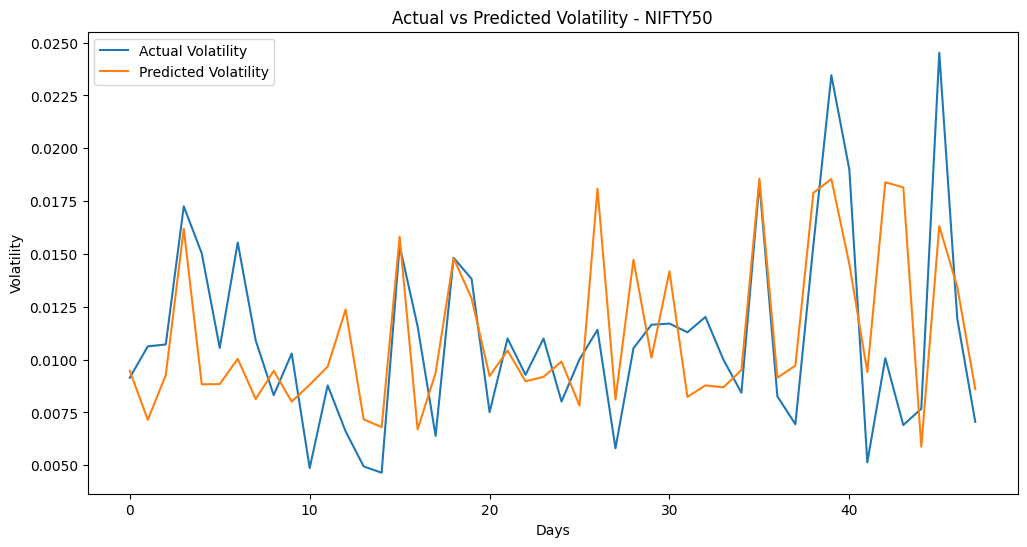

In [24]:
# Plot Actual vs Predicted Volatility
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Volatility')
plt.plot(y_pred, label='Predicted Volatility')
plt.title('Actual vs Predicted Volatility - NIFTY50')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [25]:
niftynext50 = add_features(niftynext50)
banknifty = add_features(banknifty)


In [26]:
# Split NIFTYNEXT50
X_train_nxt, X_test_nxt, y_train_nxt, y_test_nxt = train_test_split_time_series(niftynext50, feature_cols, target_col)

# Split BANKNIFTY
X_train_bnk, X_test_bnk, y_train_bnk, y_test_bnk = train_test_split_time_series(banknifty, feature_cols, target_col)


In [27]:
# Train model for NIFTYNEXT50
model_nxt = RandomForestRegressor(n_estimators=100, random_state=42)
model_nxt.fit(X_train_nxt, y_train_nxt)

# Train model for BANKNIFTY
model_bnk = RandomForestRegressor(n_estimators=100, random_state=42)
model_bnk.fit(X_train_bnk, y_train_bnk)


RandomForestRegressor(random_state=42)

In [28]:
# Predict for NIFTYNEXT50
y_pred_nxt = model_nxt.predict(X_test_nxt)

# Predict for BANKNIFTY
y_pred_bnk = model_bnk.predict(X_test_bnk)


In [29]:
# Evaluation for NIFTYNEXT50
print("NIFTYNEXT50 Evaluation:")
print(f"MAE: {mean_absolute_error(y_test_nxt, y_pred_nxt):.6f}")
print(f"MSE: {mean_squared_error(y_test_nxt, y_pred_nxt):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_nxt, y_pred_nxt)):.6f}")
print(f"R²: {r2_score(y_test_nxt, y_pred_nxt):.6f}")
print("\n")

# Evaluation for BANKNIFTY
print("BANKNIFTY Evaluation:")
print(f"MAE: {mean_absolute_error(y_test_bnk, y_pred_bnk):.6f}")
print(f"MSE: {mean_squared_error(y_test_bnk, y_pred_bnk):.6f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_bnk, y_pred_bnk)):.6f}")
print(f"R²: {r2_score(y_test_bnk, y_pred_bnk):.6f}")


NIFTYNEXT50 Evaluation:
MAE: 0.004469
MSE: 0.000035
RMSE: 0.005921
R²: 0.447588


BANKNIFTY Evaluation:
MAE: 0.003635
MSE: 0.000020
RMSE: 0.004497
R²: 0.021582


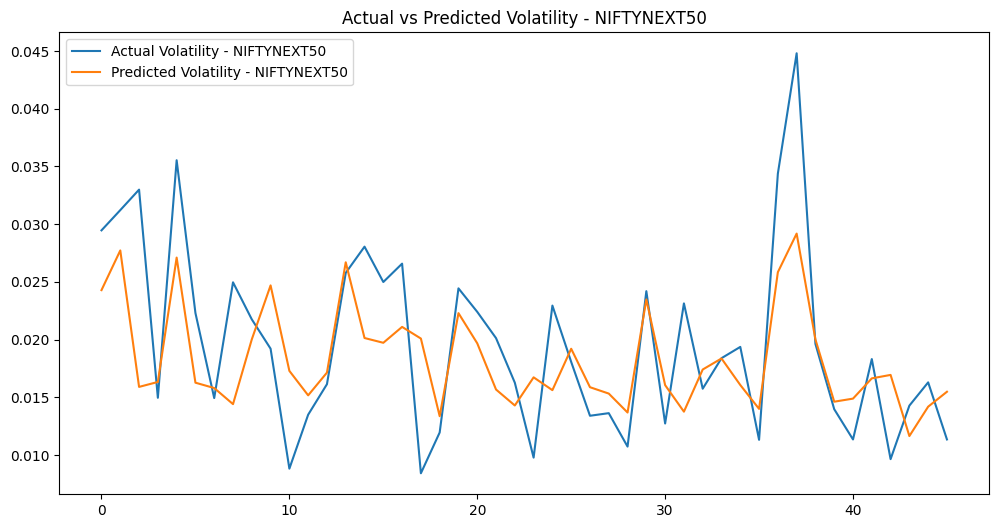

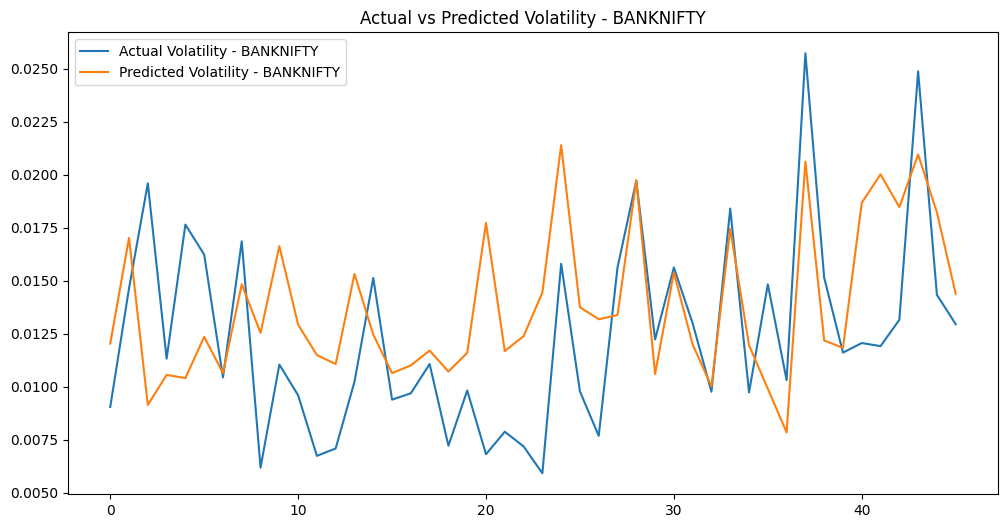

In [30]:
# Plot for NIFTYNEXT50
plt.figure(figsize=(12,6))
plt.plot(y_test_nxt.values, label='Actual Volatility - NIFTYNEXT50')
plt.plot(y_pred_nxt, label='Predicted Volatility - NIFTYNEXT50')
plt.legend()
plt.title('Actual vs Predicted Volatility - NIFTYNEXT50')
plt.show()

# Plot for BANKNIFTY
plt.figure(figsize=(12,6))
plt.plot(y_test_bnk.values, label='Actual Volatility - BANKNIFTY')
plt.plot(y_pred_bnk, label='Predicted Volatility - BANKNIFTY')
plt.legend()
plt.title('Actual vs Predicted Volatility - BANKNIFTY')
plt.show()


In [32]:
# Import necessary models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [33]:
# Models to try
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}


In [34]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, X_test, y_train, y_test, title):
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print metrics
    print(f"\n{title} - Evaluation Metrics:")
    print(f"MAE: {mae:.6f}")
    print(f"MSE: {mse:.6f}")
    print(f"RMSE: {rmse:.6f}")
    print(f"R2 Score: {r2:.6f}")
    
    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(y_test.values, label='Actual Volatility')
    plt.plot(y_pred, label='Predicted Volatility')
    plt.title(f'Actual vs Predicted Volatility - {title}')
    plt.xlabel('Days')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()
    
    return {
        "Model": title,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }



NIFTY50 - Random Forest - Evaluation Metrics:
MAE: 0.002856
MSE: 0.000014
RMSE: 0.003696
R2 Score: 0.295534


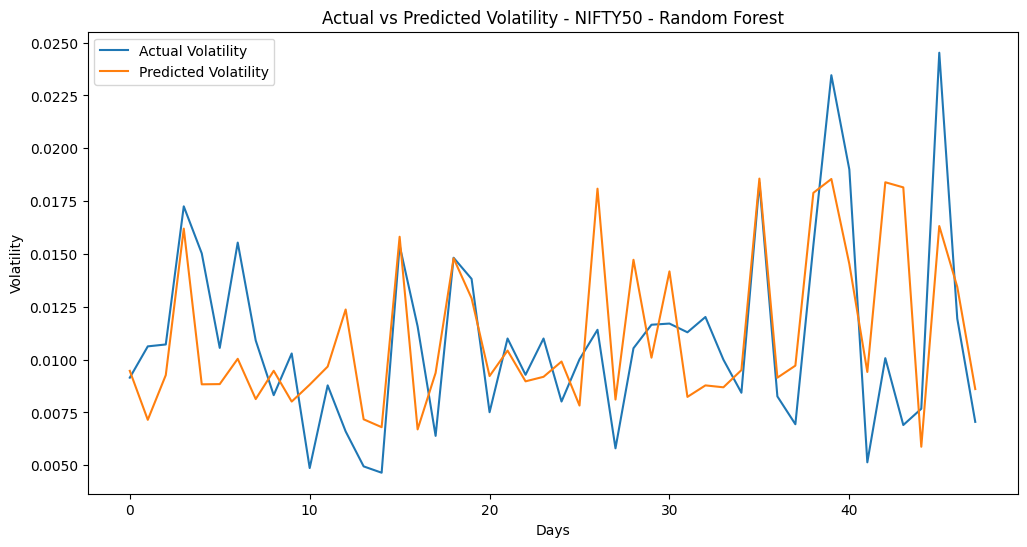


NIFTY50 - Gradient Boosting - Evaluation Metrics:
MAE: 0.002907
MSE: 0.000014
RMSE: 0.003692
R2 Score: 0.296767


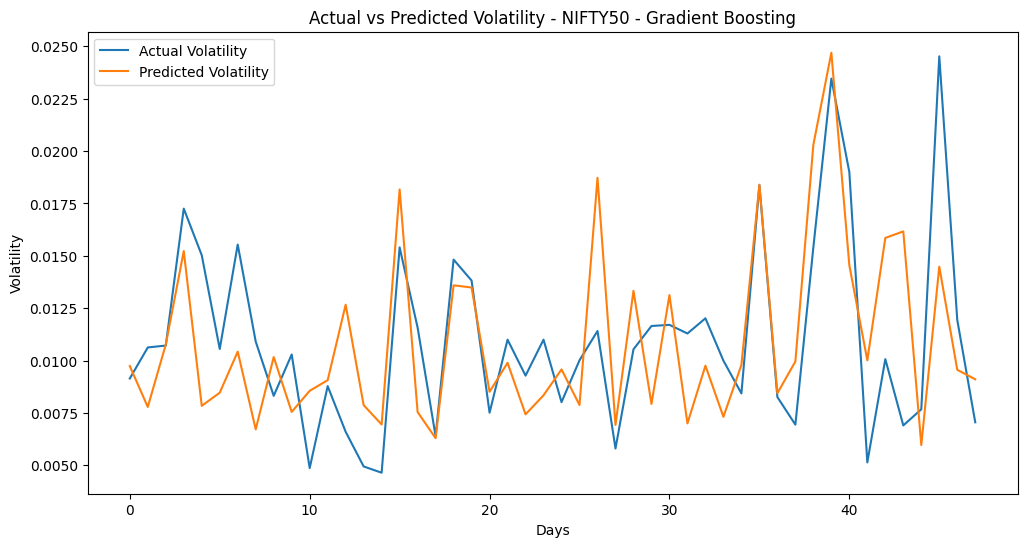


NIFTY50 - Support Vector Regressor - Evaluation Metrics:
MAE: 0.031128
MSE: 0.000988
RMSE: 0.031438
R2 Score: -49.981927


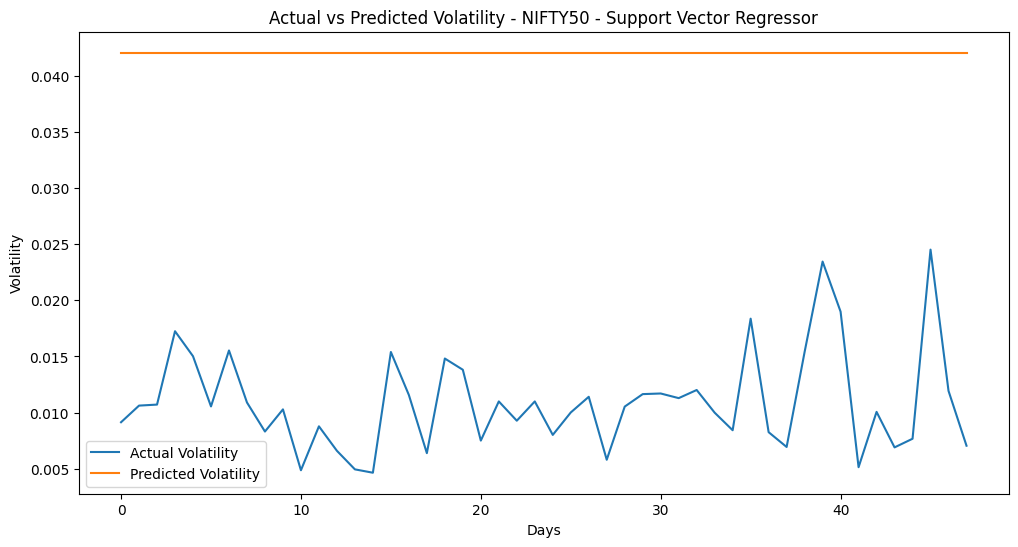


NIFTY50 - Decision Tree - Evaluation Metrics:
MAE: 0.003673
MSE: 0.000021
RMSE: 0.004580
R2 Score: -0.081884


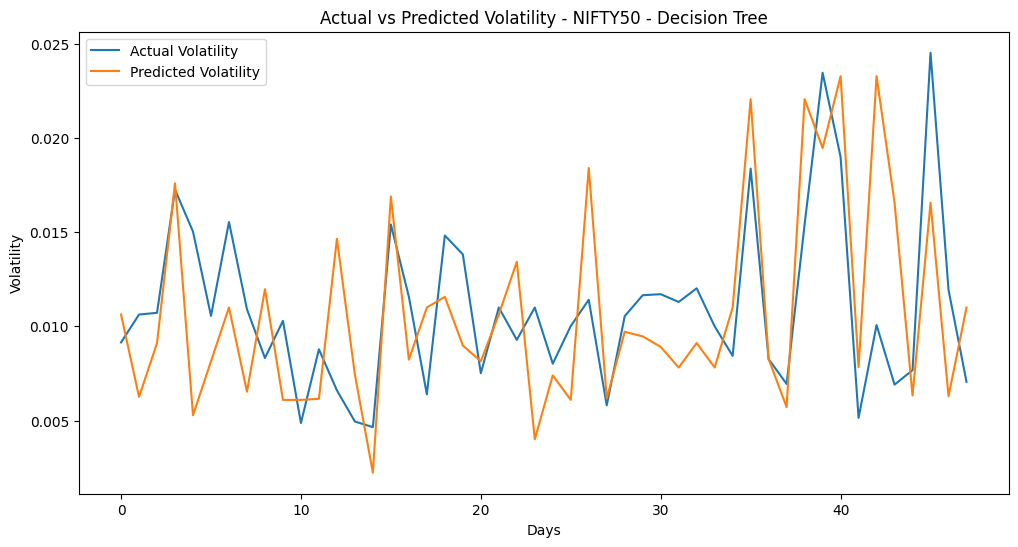


NIFTY50 - Linear Regression - Evaluation Metrics:
MAE: 0.003896
MSE: 0.000026
RMSE: 0.005098
R2 Score: -0.340731


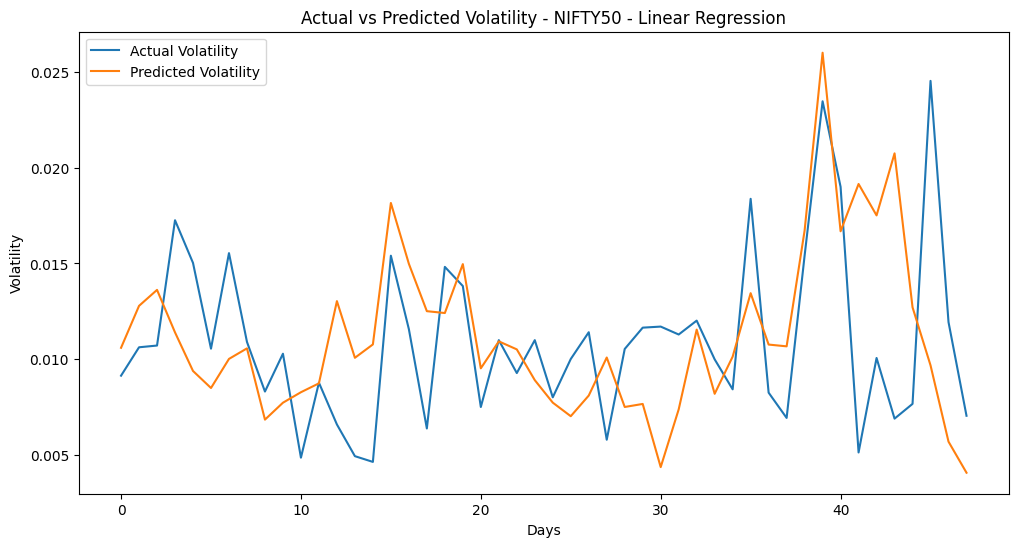

In [35]:
# Store results
results_nifty50 = []

# Loop over models
for name, model in models.items():
    res = train_evaluate_model(model, X_train, X_test, y_train, y_test, f"NIFTY50 - {name}")
    results_nifty50.append(res)



NIFTYNEXT50 - Random Forest - Evaluation Metrics:
MAE: 0.004469
MSE: 0.000035
RMSE: 0.005921
R2 Score: 0.447588


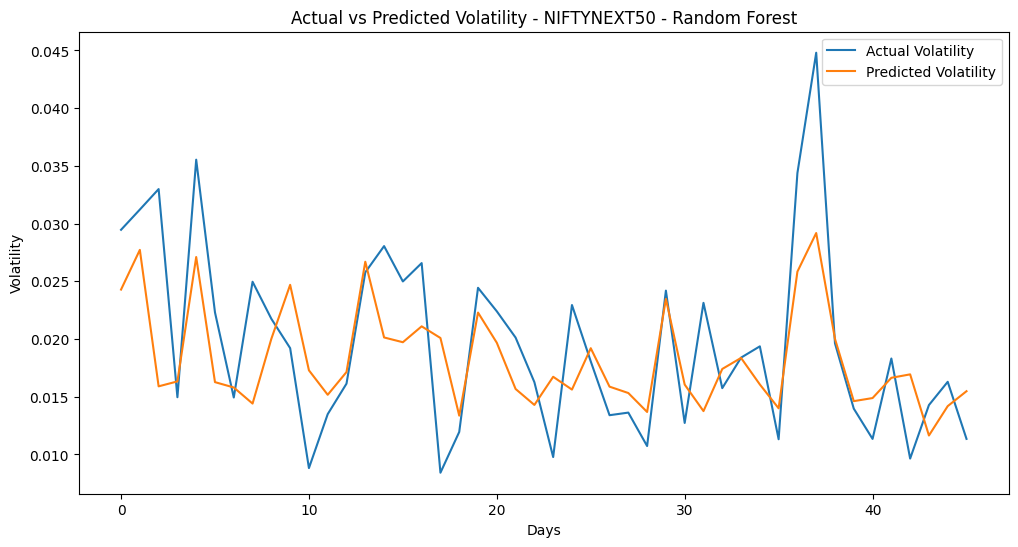


NIFTYNEXT50 - Gradient Boosting - Evaluation Metrics:
MAE: 0.004793
MSE: 0.000034
RMSE: 0.005861
R2 Score: 0.458888


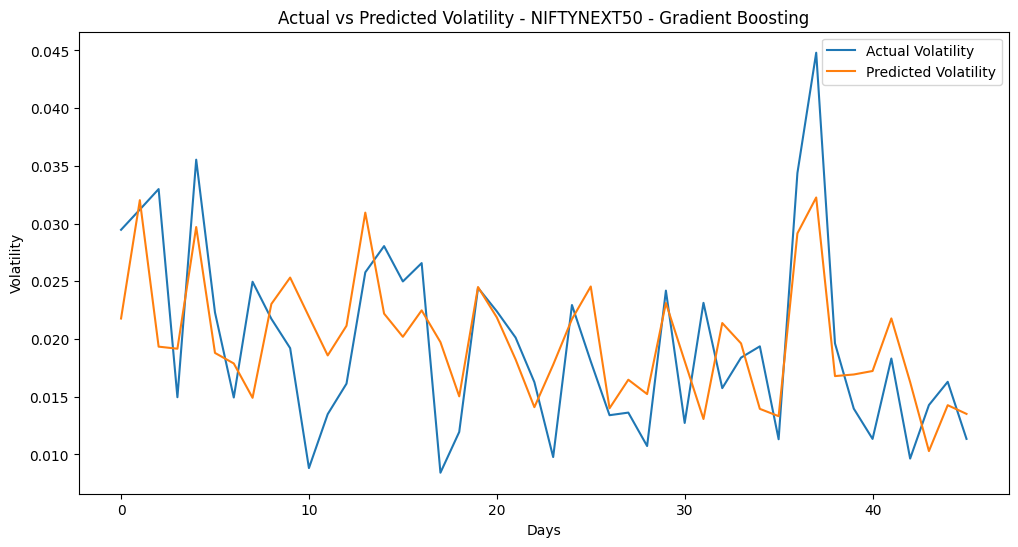


NIFTYNEXT50 - Support Vector Regressor - Evaluation Metrics:
MAE: 0.052297
MSE: 0.002798
RMSE: 0.052900
R2 Score: -43.087759


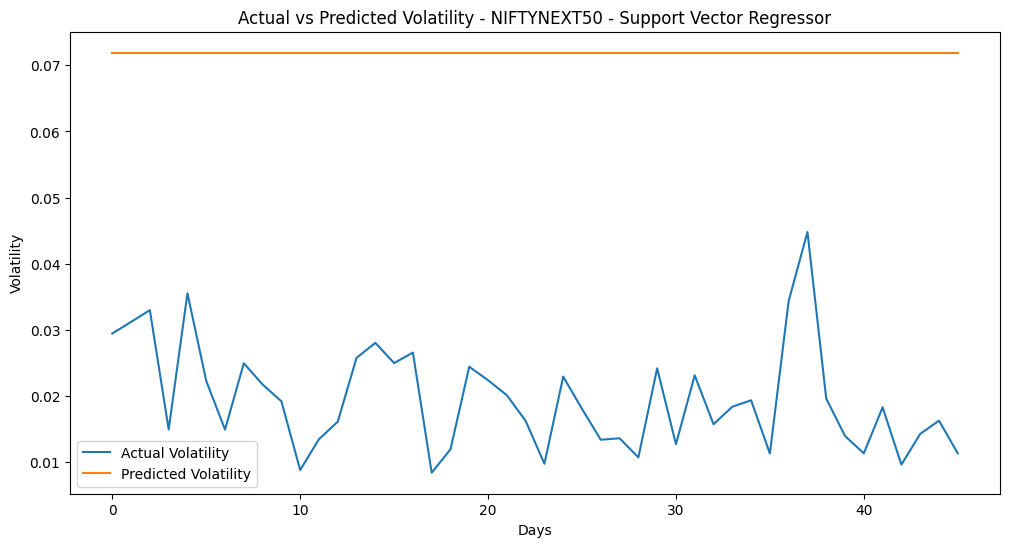


NIFTYNEXT50 - Decision Tree - Evaluation Metrics:
MAE: 0.005462
MSE: 0.000047
RMSE: 0.006876
R2 Score: 0.255179


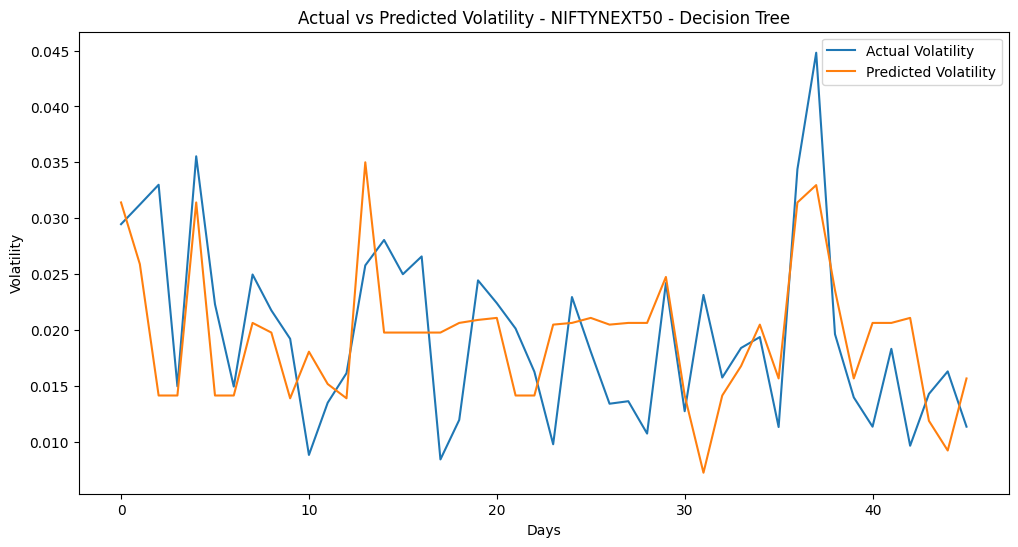


NIFTYNEXT50 - Linear Regression - Evaluation Metrics:
MAE: 0.006148
MSE: 0.000062
RMSE: 0.007881
R2 Score: 0.021418


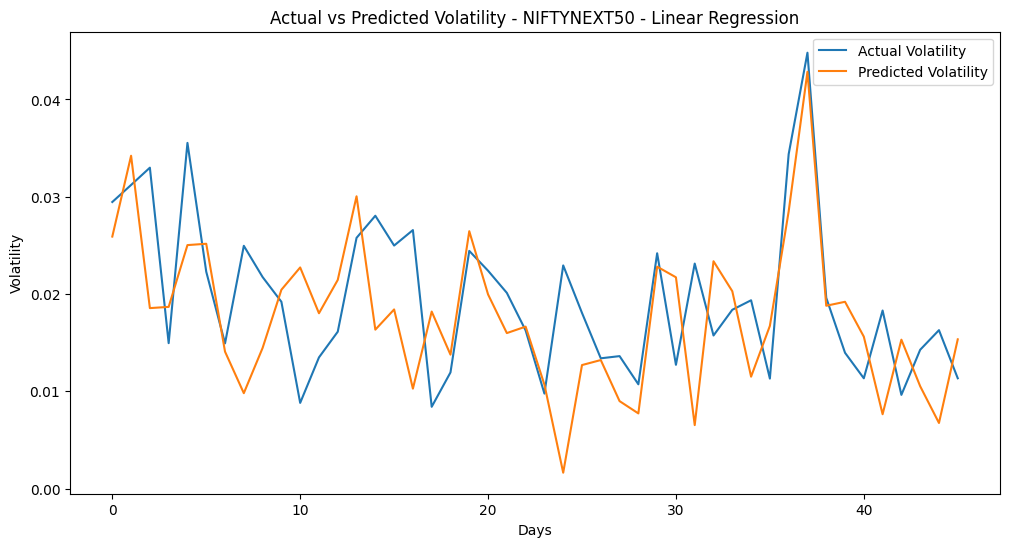


BANKNIFTY - Random Forest - Evaluation Metrics:
MAE: 0.003635
MSE: 0.000020
RMSE: 0.004497
R2 Score: 0.021582


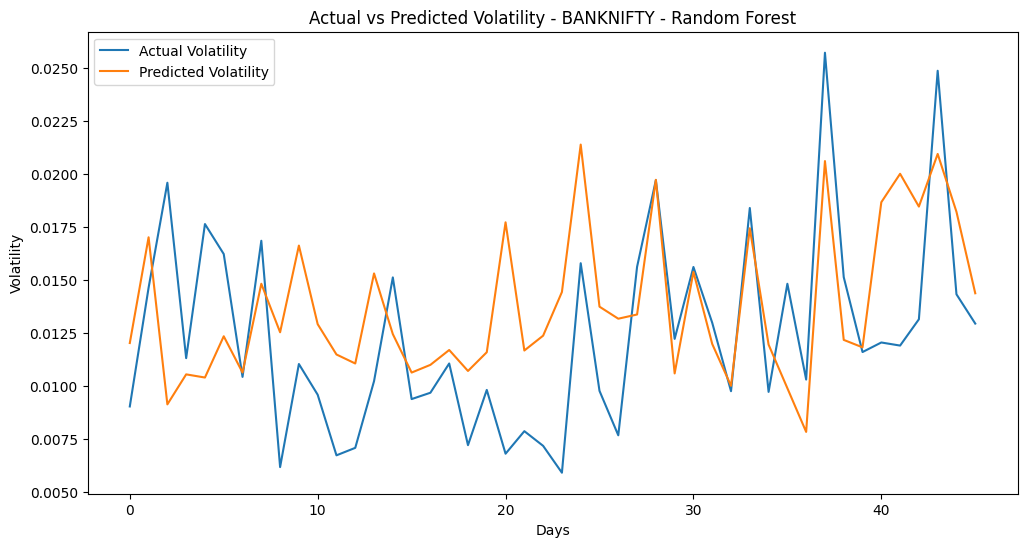


BANKNIFTY - Gradient Boosting - Evaluation Metrics:
MAE: 0.003775
MSE: 0.000022
RMSE: 0.004698
R2 Score: -0.067946


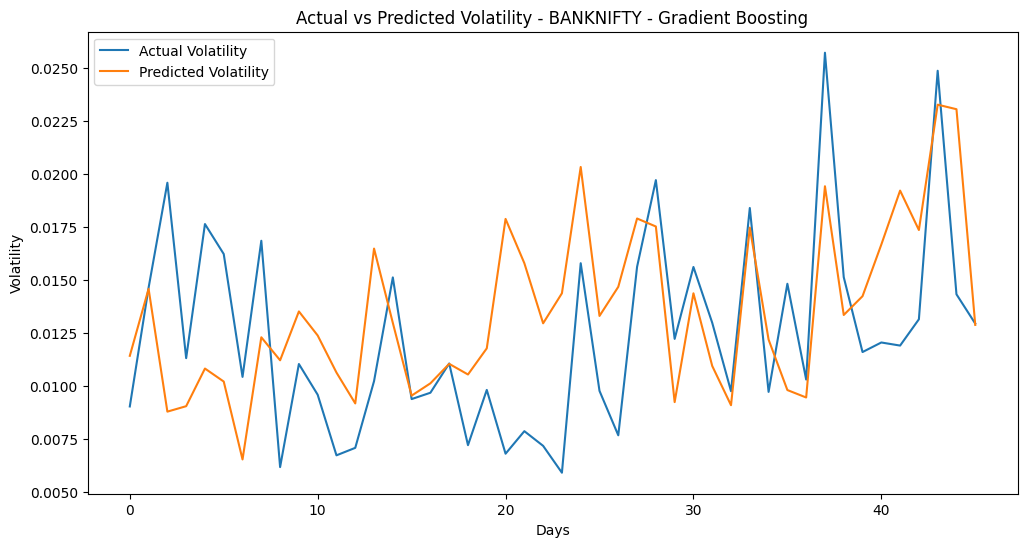


BANKNIFTY - Support Vector Regressor - Evaluation Metrics:
MAE: 0.034780
MSE: 0.001230
RMSE: 0.035076
R2 Score: -58.524913


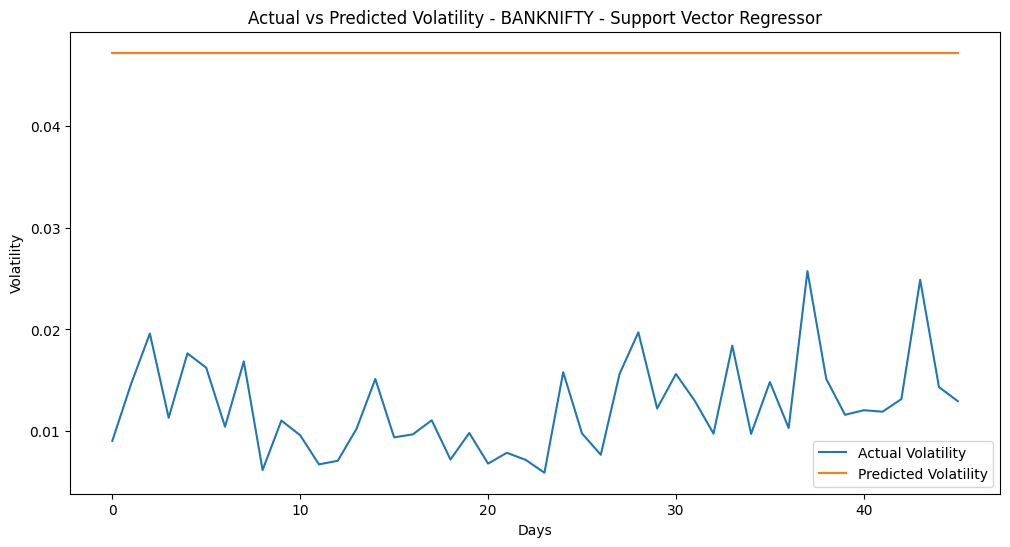


BANKNIFTY - Decision Tree - Evaluation Metrics:
MAE: 0.005024
MSE: 0.000044
RMSE: 0.006608
R2 Score: -1.112864


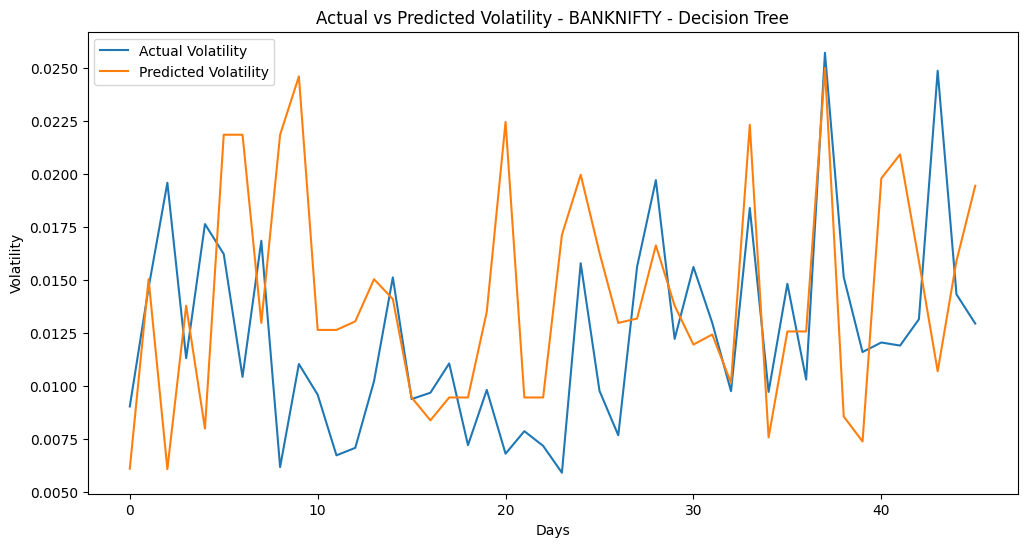


BANKNIFTY - Linear Regression - Evaluation Metrics:
MAE: 0.004117
MSE: 0.000026
RMSE: 0.005065
R2 Score: -0.241381


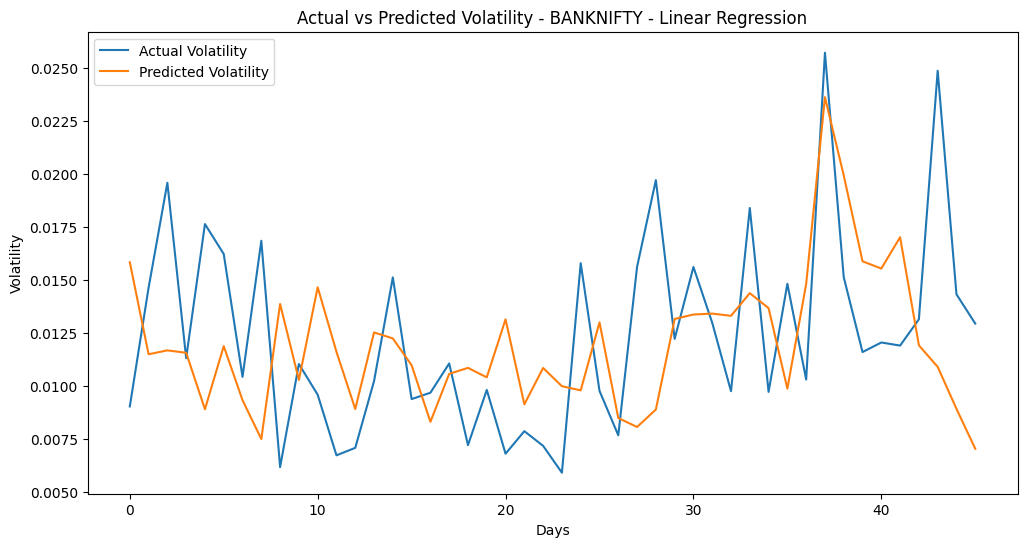

In [36]:
# NIFTYNEXT50
results_niftynext50 = []
for name, model in models.items():
    res = train_evaluate_model(model, X_train_nxt, X_test_nxt, y_train_nxt, y_test_nxt, f"NIFTYNEXT50 - {name}")
    results_niftynext50.append(res)

# BANKNIFTY
results_banknifty = []
for name, model in models.items():
    res = train_evaluate_model(model, X_train_bnk, X_test_bnk, y_train_bnk, y_test_bnk, f"BANKNIFTY - {name}")
    results_banknifty.append(res)


In [37]:
# Convert to DataFrames
df_results_nifty50 = pd.DataFrame(results_nifty50)
df_results_niftynext50 = pd.DataFrame(results_niftynext50)
df_results_banknifty = pd.DataFrame(results_banknifty)

# Show comparison
print("\n--- NIFTY50 Model Comparison ---")
display(df_results_nifty50)

print("\n--- NIFTYNEXT50 Model Comparison ---")
display(df_results_niftynext50)

print("\n--- BANKNIFTY Model Comparison ---")
display(df_results_banknifty)



--- NIFTY50 Model Comparison ---


,Model,MAE,MSE,RMSE,R2
0,NIFTY50 - Random Forest,0.002856,0.000014,0.003696,0.295534
1,NIFTY50 - Gradient Boosting,0.002907,0.000014,0.003692,0.296767
2,NIFTY50 - Support Vector Regressor,0.031128,0.000988,0.031438,-49.981927
3,NIFTY50 - Decision Tree,0.003673,0.000021,0.004580,-0.081884
4,NIFTY50 - Linear Regression,0.003896,0.000026,0.005098,-0.340731



--- NIFTYNEXT50 Model Comparison ---


,Model,MAE,MSE,RMSE,R2
0,NIFTYNEXT50 - Random Forest,0.004469,0.000035,0.005921,0.447588
1,NIFTYNEXT50 - Gradient Boosting,0.004793,0.000034,0.005861,0.458888
2,NIFTYNEXT50 - Support Vector Regressor,0.052297,0.002798,0.052900,-43.087759
3,NIFTYNEXT50 - Decision Tree,0.005462,0.000047,0.006876,0.255179
4,NIFTYNEXT50 - Linear Regression,0.006148,0.000062,0.007881,0.021418



--- BANKNIFTY Model Comparison ---


,Model,MAE,MSE,RMSE,R2
0,BANKNIFTY - Random Forest,0.003635,0.000020,0.004497,0.021582
1,BANKNIFTY - Gradient Boosting,0.003775,0.000022,0.004698,-0.067946
2,BANKNIFTY - Support Vector Regressor,0.034780,0.001230,0.035076,-58.524913
3,BANKNIFTY - Decision Tree,0.005024,0.000044,0.006608,-1.112864
4,BANKNIFTY - Linear Regression,0.004117,0.000026,0.005065,-0.241381


In [1]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred, index_name):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.reset_index(drop=True), label='Actual Volatility', color='blue')
    plt.plot(y_pred, label='Predicted Volatility', color='orange')
    plt.title(f'Actual vs Predicted Volatility ({index_name})')
    plt.xlabel('Time')
    plt.ylabel('Volatility')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [5]:
plot_actual_vs_predicted(x_test, rf_pred, "NIFTY50 - Random Forest")


NameError: name 'x_test' is not defined